# Optimization and Data Fitting
## PyIU Advanced Python Workshop

Author: Robert Howard

Last modified: 4/17/2025

This notebook covers several methods for fitting simple models to data.

### Polynomial Fitting with `np.polyfit`

`np.polyfit` is the simplest way to fit data in Python, but as the name suggests, it only works with polynomials. We'll start by illustrating how it can be used to fit a straight line.

In its simplest use case, the function takes three arguments: your x values, your y values, and the degree of the polynomial you want to fit. Using least-squares regression, it then returns a tuple containing the fit parameters defining the best-fit polynomial of the specified degree. It has many other features as well, all of which you can learn more about on the [documentation page](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Optimal slope: -1.975
Optimal y-intercept: 4.972


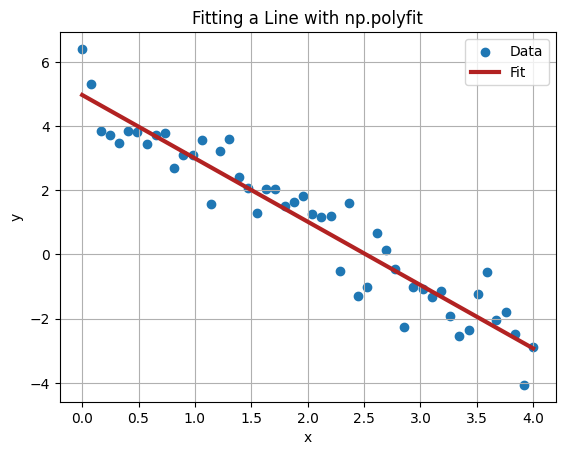

In [ ]:
# Define a linear function
def line(x, a, b):
    return a*x + b

# Specify slope, y-intercept, and x range, then compute y values
a = -2
b = 5
x = np.linspace(0, 4, 50)
y = line(x, a, b)

# Add noise from a Gaussian (normal) distribution with mean 0 and standard deviation 0.6
y += np.random.normal(0, 0.8, len(x))

# Perform fit to find optimal slope and y-intercept, then print results
# In this example, a_fit and b_fit should be nearly identical to the a and b we started with,
# but we won't always know what they're supposed to be
a_fit, b_fit = np.polyfit(x, y, 1)
y_fit = line(x, a_fit, b_fit)
print(f'Optimal slope: {round(a_fit, 3)}\nOptimal y-intercept: {round(b_fit, 3)}')

# Plot results
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'C0', label = 'Data')
ax.plot(x, y_fit, color = 'firebrick', lw = 3, label = 'Fit')
ax.set(xlabel = 'x', ylabel = 'y', title = 'Fitting a Line with np.polyfit')
ax.grid()
ax.legend()
plt.show()

As you can see, that was pretty easy! It works with higher-order polynomials too:

Optimal a: -0.762
Optimal b: 5.124
Optimal c: -9.41
Optimal d: 5.391


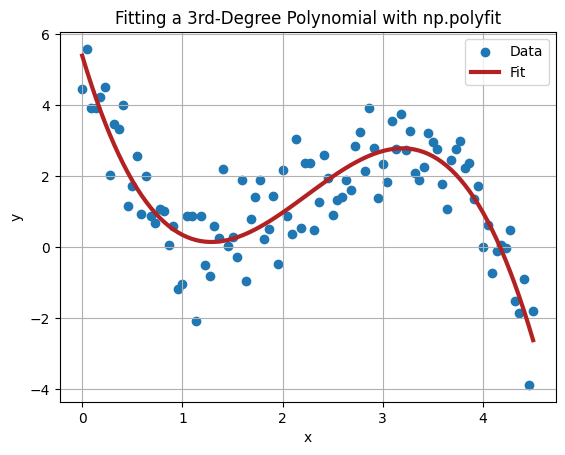

In [ ]:
# Define a cubic function
def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Specify fit parameters and x range, then compute y values
a, b, c, d = -0.75, 5, -9, 5
x = np.linspace(0, 4.5, 100)
y = cubic(x, a, b, c, d)

# Add noise
y += np.random.normal(0, 0.8, len(x))

# Perform fit and print results
p = np.polyfit(x, y, 3)
y_fit = cubic(x, *p)
for let, val in zip(('a', 'b', 'c', 'd'), p):
    print(f'Optimal {let}: {round(val, 3)}')

# Plot results
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'C0', label = 'Data')
ax.plot(x, y_fit, color = 'firebrick', lw = 3, label = 'Fit')
ax.set(xlabel = 'x', ylabel = 'y', title = 'Fitting a 3rd-Degree Polynomial with np.polyfit')
ax.grid()
ax.legend()
plt.show()

### General Fitting with `scipy.optimize.curve_fit`

`scipy.optimize.curve_fit` is much more powerful than `np.polyfit`, because it can fit a function of *any form*. Instead of specifying the degree of the polynomial you want to be fit, you give `curve_fit` a function definition with as many free parameters as you want, and `curve_fit` will account for all of them, again using least-squares regression.

In its simplest use case, `curve_fit`takes three arguments: the function you want to fit to, your x values, and your y values. It then returns a tuple containing the optimal fit parameters (`popt`) and a covariance matrix (`pcov`). The covariance matrix can be used to estimate the uncertainties on the fit parameters.

As with `np.polyfit`, `curve_fit` can do all kinds of other things, all of which are described in detail on its [documentation page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [ ]:
from scipy.optimize import curve_fit

Optimal a: 1.922 +/- 0.128
Optimal b: -2.046 +/- 0.048


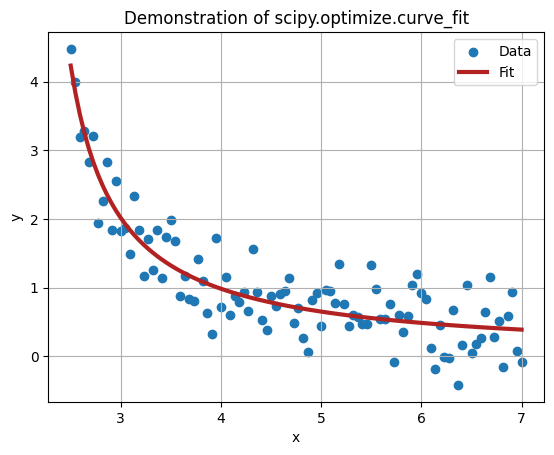

In [ ]:
# Define a simple function to test
# The order of the arguments here is important: the independent variable must come first, followed by
# all the fit parameters as separate arguments
def my_function(x, a, b):
    return a/(x + b)

# Specify fit parameters and x range, then compute y values
params = (2, -2)
x = np.linspace(2.5, 7, 100)
y = my_function(x, *params)

# Add noise
y += np.random.normal(0, 0.4, len(x))

# Perform fit
popt, pcov = curve_fit(my_function, x, y)

# Compute uncertainties on fit parameters from covariance matrix
perr = np.sqrt(np.diag(pcov))

# Compute y values of the fit line and print results
y_fit = my_function(x, *popt)
for let, val, err in zip(('a', 'b'), popt, perr):
    print(f'Optimal {let}: {round(val, 3)} +/- {round(err, 3)}')

# Plot results
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'C0', label = 'Data')
ax.plot(x, y_fit, color = 'firebrick', lw = 3, label = 'Fit')
ax.set(xlabel = 'x', ylabel = 'y', title = 'Demonstration of scipy.optimize.curve_fit')
ax.grid()
ax.legend()
plt.show()

That wasn't so bad! Here's a slightly more complicated example, where it helps to include initial guesses for the values of our fit parameters. Sometimes including initial guesses can help `curve_fit` successfully fit a dataset when it would otherwise fail.

Optimal a: 2.097 +/- 0.135
Optimal b: -0.596 +/- 0.055
Optimal c: 4.963 +/- 0.053
Optimal d: -0.989 +/- 0.058
Optimal e: 0.214 +/- 0.025
Optimal f: 2.956 +/- 0.058


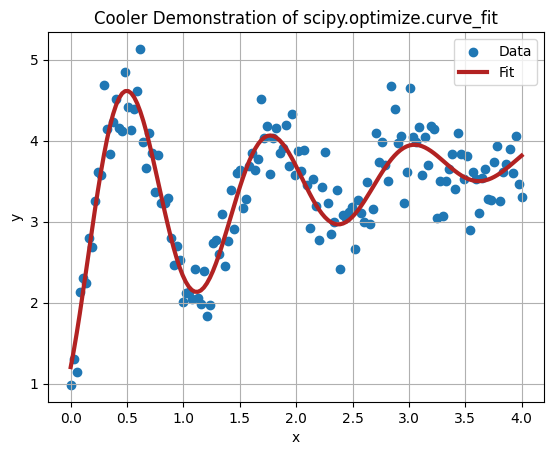

In [ ]:
# Define a cooler-looking function
def my_cooler_function(x, a, b, c, d, e, f):
    return a*np.exp(b*x)*np.sin(c*x + d) + e*x + f

# Specify fit parameters and x range, then compute y values
params = (2, -0.6, 5, -1, 0.2, 3)
x = np.linspace(0, 4, 150)
y = my_cooler_function(x, *params)

# Add noise
y += np.random.normal(0, 0.3, len(x))

# Perform fit, including initial guesses, because this particular fit sometimes fails without them
popt, pcov = curve_fit(my_cooler_function, x, y, p0 = (1, -1, 4, 0, 0.5, 2))

# Compute uncertainties on fit parameters from covariance matrix
perr = np.sqrt(np.diag(pcov))

# Compute y values of the fit line and print results
y_fit = my_cooler_function(x, *popt)
for let, val, err in zip(('a', 'b', 'c', 'd', 'e', 'f'), popt, perr):
    print(f'Optimal {let}: {round(val, 3)} +/- {round(err, 3)}')

# Plot results
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'C0', label = 'Data')
ax.plot(x, y_fit, color = 'firebrick', lw = 3, label = 'Fit')
ax.set(xlabel = 'x', ylabel = 'y', title = 'Cooler Demonstration of scipy.optimize.curve_fit')
ax.grid()
ax.legend()
plt.show()

### Orthogonal Distance Regression with `scipy.odr`

Orthogonal distance regression (ODR) isn't inherently more advanced or intricate than least-squares regression with `curve_fit`, but it uses a different method to optimize the fit parameters, so sometimes it will succeed where `curve_fit` fails. Instead of minimizing the vertical distances between the points and the fit, ODR minimizes the total distance between the points and the fit, accounting for horizontal offsets as well. (See this [Wikipedia article](https://en.wikipedia.org/wiki/Total_least_squares#Background) for a nice illustration, but don't worry about all the matrix math.)

ODR also allows you to account for errors in both the independent and dependent variables (x and y), while `curve_fit` only allows for errors in the dependent variable (y). We won't cover this here, but see the [documentation page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.ODR.html) for more details.

Here's a very simple example illustrating the mechanics of `scipy.odr`.

In [ ]:
from scipy import odr

Optimal slope: 3.953 +/- 0.192
Optimal y-int: -8.183 +/- 0.334


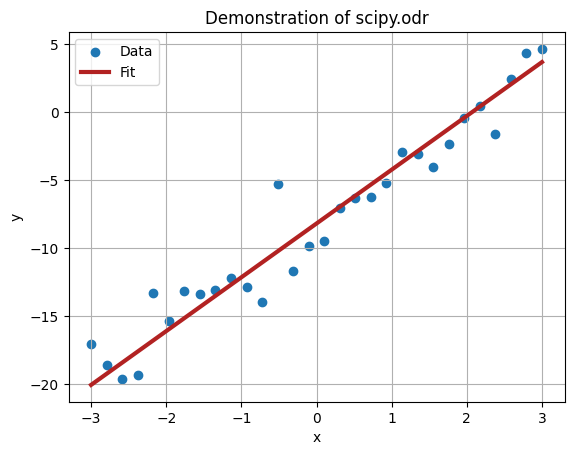

In [ ]:
# Define a simple function to test
# The order of the arguments is important here as well, but different than with curve_fit: the independent variable
# comes second, preceded by a tuple (or list, numpy array, etc.) containing the fit parameters
def fit_function(p, x):
    return p[0]*x + p[1]

# Specify fit parameters and x range, then compute y values and add noise
p = (4, -8)
x = np.linspace(-3, 3, 30)
y = fit_function(p, x)
y += np.random.normal(0, 1.5, len(x))

# Here we start using the odr module. First, we define a "Model" object based on the function we want to fit
model = odr.Model(fit_function)

# Next, we package our data points inside a special "Data" object
# This would look a little different if our points had error bars; we would instead use odr.RealData
data = odr.Data(x, y)

# We then create an "ODR" object, which will perform the fits later. We must give it initial guesses for the fit
# parameters. Because we're fitting such a simple function, we can generate those initial guesses with np.polyfit
fitter = odr.ODR(data, model, beta0 = np.polyfit(x, y, 1))

# Perform fit and retrieve fit parameters and errors
output = fitter.run()
popt, perr = output.beta, output.sd_beta

# Compute y values of the fit line and print results
y_fit = fit_function(popt, x)
for param, val, err in zip(('slope', 'y-int'), popt, perr):
    print(f'Optimal {param}: {round(val, 3)} +/- {round(err, 3)}')

# Plot results
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'C0', label = 'Data')
ax.plot(x, y_fit, color = 'firebrick', lw = 3, label = 'Fit')
ax.set(xlabel = 'x', ylabel = 'y', title = 'Demonstration of scipy.odr')
ax.grid()
ax.legend()
plt.show()

Here's a neat trick we can do to visualize the errors in the fit parameters: we can show confidence intervals! This works well for linear fitting, but your results may vary for non-linear fits. You can do this with `np.polyfit` and `scipy.optimize.curve_fit` as well; I'm just choosing to include it here.

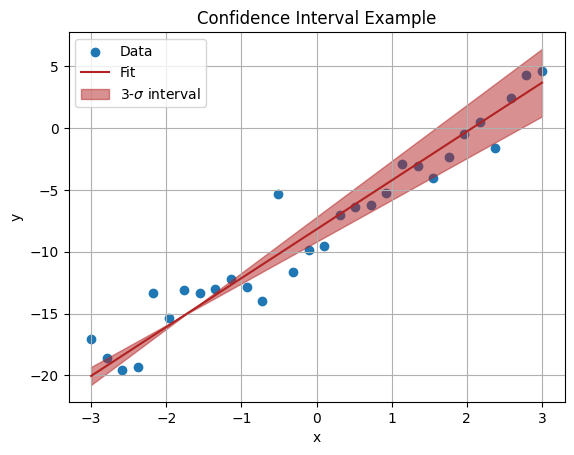

In [ ]:
# First, we'll decide to show a 3-sigma confidence interval around the fit line
nstd = 3

# Compute fit parameters for boundaries of confidence interval
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr

# Compute y values of boundaries of confidence interval
y_fit_up = fit_function(popt_up, x)
y_fit_dw = fit_function(popt_dw, x)

# Plot results
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'C0', label = 'Data')
ax.plot(x, y_fit, color = 'firebrick', label = 'Fit')
ax.fill_between(x, y_fit_up, y_fit_dw, alpha = 0.5, color = 'firebrick', label = f'{nstd}-$\sigma$ interval')
ax.set(xlabel = 'x', ylabel = 'y', title = 'Confidence Interval Example')
ax.grid()
ax.legend()
plt.show()

### Further Explorations in Fitting

- [Symbolic regression](https://en.wikipedia.org/wiki/Symbolic_regression) with [gplearn](https://gplearn.readthedocs.io/en/stable/) or [PySR](https://github.com/MilesCranmer/PySR). This technique doesn't require you to know the function you want to fit to your data. Instead, the algorithm will produce its best guess at the functional form that best approximates the data!
- Interpolation with cubic splines using [scipy.interpolate.CubicSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html). Interpolation involves finding a function that passes directly through each input data point instead of simply passing nearby. For this reason, interpolation is better suited for cases when you know that every data point should lie exactly on the function, or in other words, when there's no noise in the data.